<a href="https://colab.research.google.com/github/Ricardoogawa22/data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

 Com a facilidade que temos hoje de uso dos cartões de débito ou crédito. Uma das maiores preocupações das instituições financeiras é o problema com fraudes. Só no Brasil cerca de 12,1 milhões de pessoas já foram vítimas de algum crime como esse. Segundo a BTTng, ouve também do primeiro semestre de 2021 para o primeiro semestre de 2022, um aumento de 637% nas tentativas de fraudes financeiras, que somaram aproximadamente 1,8 bilhão de reais de prejuízos.


<p align=center>
<img src="https://img.freepik.com/fotos-gratis/conceito-de-colagem-html-e-css-com-hacker_23-2150061984.jpg?w=740&t=st=1678187940~exp=1678188540~hmac=118fa8c05006cb87ee47bcca6fd62a6109a9977095f716e983b01c3869d13791"></p>

 Dentre esses golpes quem nunca teve ou conhece alguém que teve algum valor debitado ou na fatura de compras que não tenha feito? 
 Podemos considerar que fraudes relacionadas a cartões de crédito são de grande relevância, uma vez que a sua não-detecção acarretará prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Usaremos para esse estudo dados fornecidos por algumas empresas de cartões de crédito europeias. Foram fornecidos os dados de 2 dias de transações extremamente desbalanceado, por conta de conter 290 mil transações, entre elas 492 fraudes, que representam apenas 0,17% do Dataset.

 Temos outro detalhe para nos atentar no nosso Dataset. Por conta de privacidade e segurança dos clientes, nossa features foram descaracterizadas e são todas numéricas.


<p align=center>
<img src="https://img.freepik.com/fotos-gratis/pague-as-mercadorias-com-cartao-de-credito-atraves-de-um-smartphone-em-uma-cafeteria_1150-18769.jpg?w=740&t=st=1678272649~exp=1678273249~hmac=5bd9ea7607fb978d34d110ce8ac1d9e98b491cb95b8b47b2bb1de612500b9ecb"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, f1_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
Colors = ("#085f63", "#ff5959")

### Importando Dataset

Abaixo importanmos nosso dataset usando `pd.read_csv()`, visualizamos o tamanho do nosso DataFrame com `df.shape()` e usamos também `df.head()` para visualizar nossas 5 primeiras entradas.

In [ ]:
# importar os dados para um dataframe

df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

#dimensões do conjunto oiriginal
print("Dimensões do Conjunto Origina: ",df.shape)

df.head()

Dimensões do Conjunto Origina:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Criando conjunto de teste 

No nosso conjunto de teste usando `df.sample` fiaremos com a porcentagem de 15%. Após criarmos nosso teste, é necessário retirar as entradas selecionadas do nosso dataset original, para não haver possível duplicidade e vazamento de dados.

In [ ]:
#criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

#retirando as linhas de teste
df = df.drop(test.index)

#verificando o cojunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


Abaixo apenas resetamos nosso index, para que não fique memorias anteriores  preservadas.

In [ ]:
# resetando o index dos conjuntos
df.reset_index()
test.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
1,255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
2,244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
3,63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
4,11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42716,229333,145885.0,-0.330429,0.587057,0.635175,-0.619929,0.690199,-1.146289,0.914373,-0.158436,...,-0.172181,-0.540837,0.047329,-0.037745,-0.671478,0.119750,0.094611,0.173363,1.29,0
42717,189242,128317.0,-17.015895,-18.501723,-2.965763,5.989228,7.811563,-4.440128,-1.905238,-1.938201,...,-5.414098,3.688960,11.360879,0.771200,2.274458,1.954516,6.507171,-4.075417,6.37,0
42718,232656,147253.0,0.044490,0.898231,0.306854,-0.587229,0.441139,-1.121860,1.039291,-0.231897,...,-0.255365,-0.535225,0.064659,0.050984,-0.476387,0.136342,0.250095,0.098383,2.69,0
42719,174418,121905.0,1.945191,-0.273317,-0.126410,0.436141,-0.841361,-1.026928,-0.323962,-0.216008,...,-0.211303,-0.481833,0.466048,0.482353,-0.668233,0.198535,-0.033724,-0.033819,23.99,0


Agora tendo os dados importados para dentro de uma estrutura *Dataframe* - e como não houve a necessidade de mais ajustes ou configurações nesta etapa, pode-se dar início  à **análise exploratória** dos dados a fim de preparar um modelo de ***Machine Learning***.

Feito isso, vamos à **Análise Exploratória**.

## Análise Exploratória

Iremos aborda nessa análise:

* 5 primeiras entradas
* Resumo estatístico do dataframe
* Se há dados ausentes
* Gráfico de barras para ver o balanceamento do *dataset*
* Os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* `Boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Matriz de correlação

###Resumo estatístico do dataframe

Primeiro vamos observar as variáveis que temos no nosso Dataframe.

In [ ]:
#Visualisando variáveis

print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Em seguida geramos com `dtypes` uma lista dos tipos das nossas variáveis. Esse processo é importante, pois existem alguns formatos que entradas que não conseguimos trabalhar.

In [ ]:
#Visualisando tipo de variáveis

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Vemos também a quantidade de cada tipo de variável.

In [ ]:
#Quantidade de cada tipode de variável

df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

###Dados ausentes

Um dos passos muito importante da nossa analise é observar se há muitos dados faltantes no nosso Dataset. Se houver variáveis com poucos dados, podemos remove-la para que não interfira na nossa analise.

In [ ]:
#Visualisando dados ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

Como podemos ver nosso Dataset está completo, portando podemos seguir com nosso estudo.

### Resumo estatístico do dataframe
Visualizamos agora usando `df.describe()` uma tabela com estátisticas do Dataset.

In [ ]:
# Conjuntos de estátiscas 

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


###Balanceamento do Dataset

Usando um gráfico de barras observaremos como está o balanceamento de entradas para transações normais e fraudes.


0    241668
1       418
Name: Class, dtype: int64

As fraudes representam0.1727% do dataset.



[]

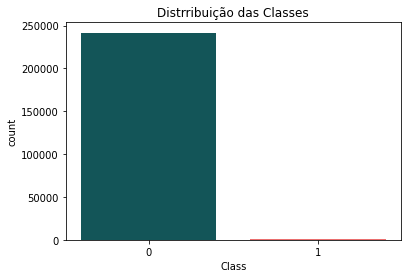

In [ ]:
#plotando gráfico de barras

print(df.Class.value_counts())
print("\nAs fraudes representam{:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, palette=Colors, ax=ax)
ax.plot
ax.set_title('Distrribuição das Classes')
plt.plot()

Como podemos ver, é discrepante a quantidade entre trasações normais e transações fraudulentas. É imposíovel ver no gráfico a quantidade de fraudes, que representam **1,727%**.

Com essa diferença de distribuição entre **classe 0 e 1**, fica inviável fazer um modelo com esses dados. Pois é risco do nosso modelo não identificar as fraududes é muito grande.

Plotamos a seguir 2 gráficos com a variável **Time e a quantidade de transações**. Os primeiros são para transações normais e o segundo para transações fraudulentas.

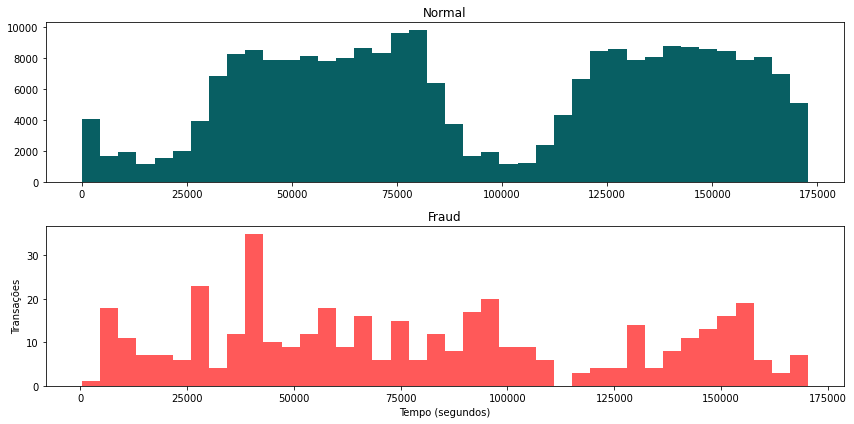

In [ ]:
#Plotando gráfico de barras
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color="#085f63")
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color="#ff5959")
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Embora tenhamos plotado o gráfico, não conseguimos encontrar alguma relação para detectar quando é fraude ou genuína.

###Boxplot

Seguindo nossa análise usamos um **Diagrama de Caixa** para observar se existe diferença de padrão das transações. 

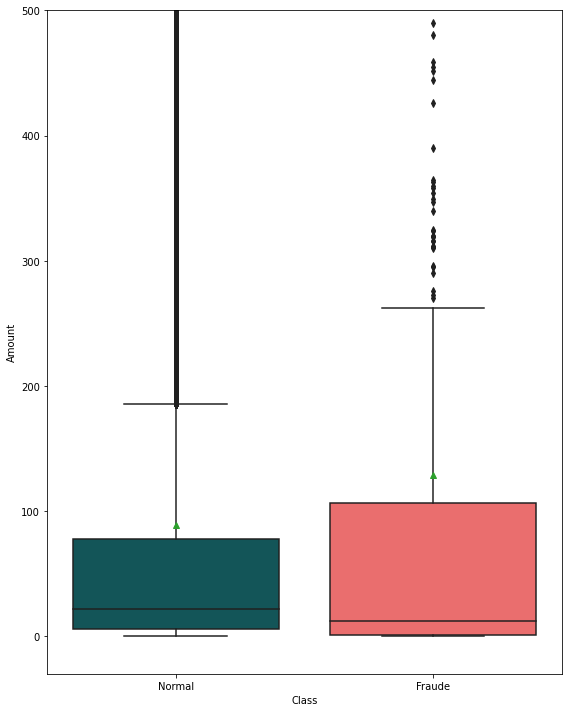

In [ ]:
fig, ax = plt.subplots(figsize=(8,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, palette=Colors, ax=ax)
plt.ylim((-30, 500))
plt.xticks([0,1], ['Normal', 'Fraude'])

plt.tight_layout()

Com o Boxplot conseguimos visualizar uma distribuição diferente entre fraudes e não fraudes. 

Se visualizarmos o conjuntos de estátiscas das transações fraudolenta, a média da variável Amount,está em 123.70 e a mediana em 11.40

In [ ]:
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     417.000000
mean      123.706859
std       249.477727
min         0.000000
25%         1.000000
50%        11.400000
75%       106.550000
max      1809.680000
Name: Amount, dtype: float64

### Visualisando distribuição de cada variável

Com o gráfico de densidade, veremos a distribuição de cada variável V em relação a classe se é fraude ou não. 

In [ ]:
# Removendo variaveis

column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns

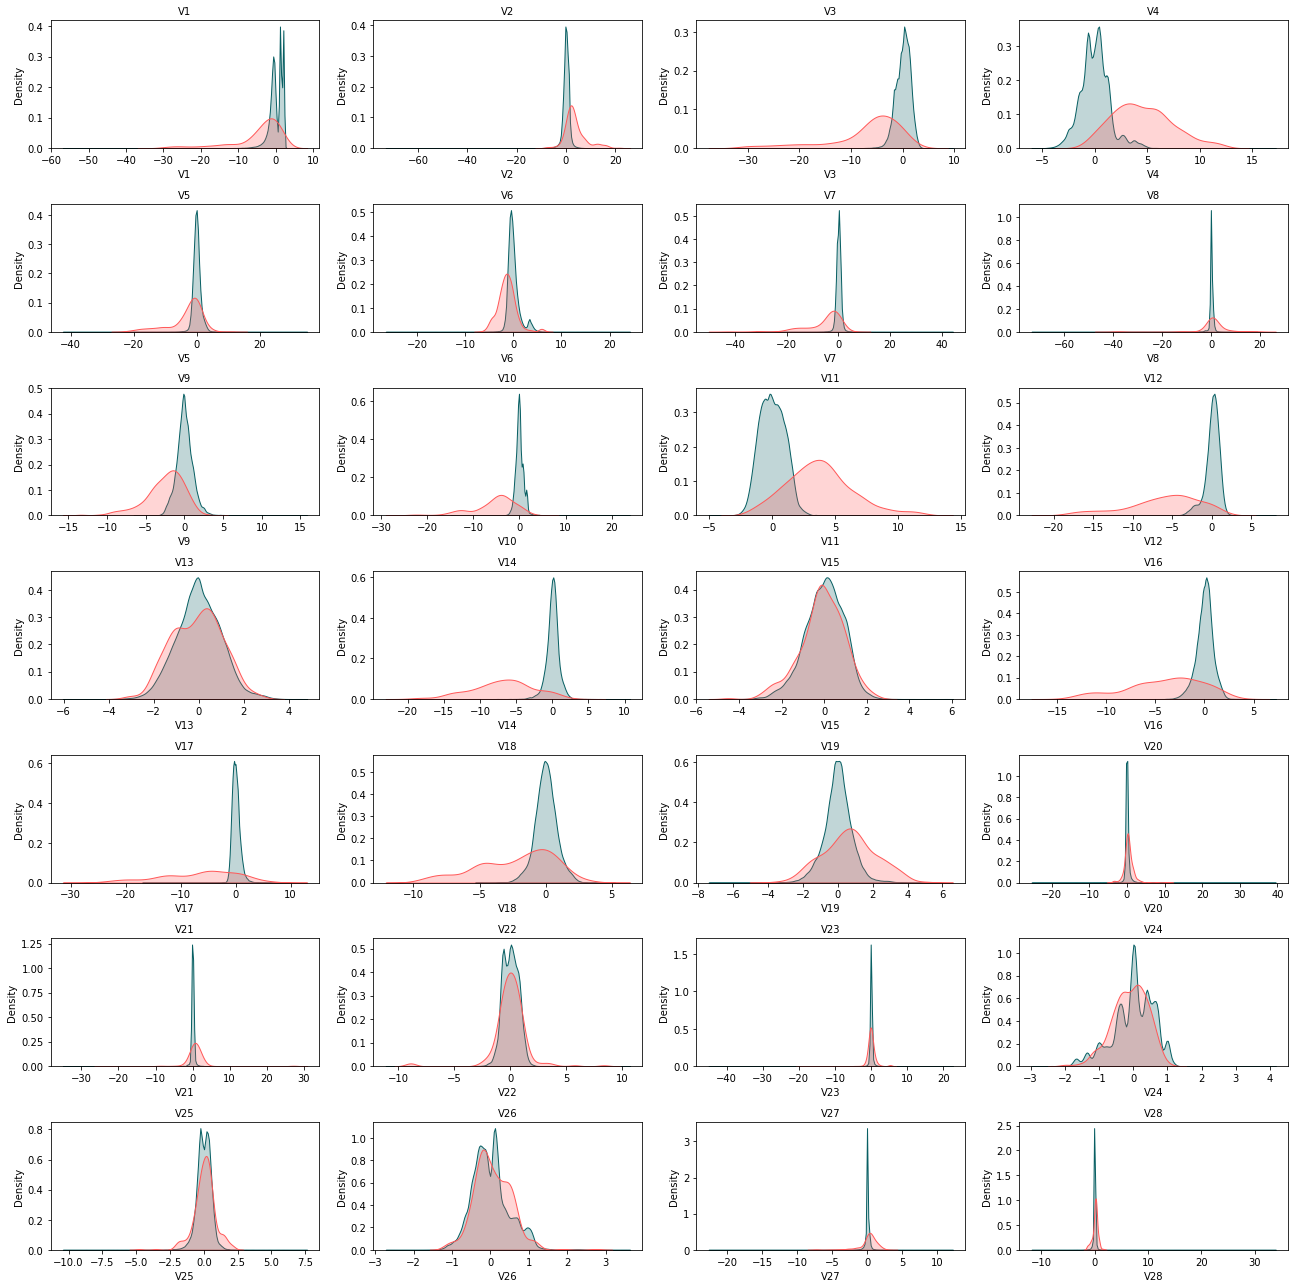

In [ ]:
# Plotando gráfico de densidade
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", color="#085f63", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", color="#ff5959", shade=True)
    plt.title(col, fontsize=10)

plt.tight_layout()

É possível observar por exemplo nas variáveis V1, V2, V3, V4 uma diferença na distribuição entre eles. Que nos ajuda visualizar uma diferença entre fraude ou não.

Já por outro lado, as variáveis V13, V15, V22 e V25, estão com a distribuição muito parecida, o que nos dificulta a identificação das fraudes.


## Preparação dos Dados
Nessa próxima etapa iremos preparar nossos dados para alimentar o modelo de Regressão Logística que iremos usar com os seguintes passos.

* 	Normalizar os dados que ainda não haviam sido pré-processados (Time e Amount)
•	Dividir o conjunto de dados entre treino e validação
•	Balancear o conjunto de dados


### Criando um padrão para `Time` e `Amount`

Como existem outliers nas 2 variáveis, usaremos o `StandardScaler` para criar um padrão entre elas elas.

In [ ]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


###Criando os conjuntos de Treino e Validação
Nessa etapa iremos repartir os dados que temos entre **Treino e Validação**. Senão fizermos esse procedimento não conseguimos dizer que o balanceamento que faremos será adequado.

Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

###Balanceamento dos dados


Para o balanceamento de dados usamos a biblioteca `imblearn` que possibilita aplicar de maneira muito fácil a técnica. Nesse caso usamos `Under-sampling`, para aproximar a classe com poucos dados deixando ela maior artificialmente.

0    313
1    313
Name: Class, dtype: int64


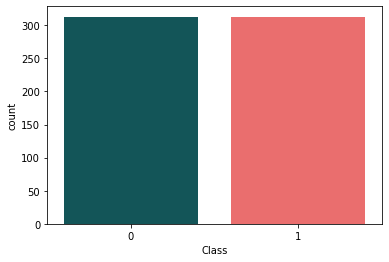

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus, palette=Colors);

Agora podemos ver que nosso dado não tem mais aquela diferença enorme como vimos em um dos primeiros gráficos do estudo. 

###Matriz de Correlação

Em seguida plotaremos uma matriz de correlação, observando se há diferença entre os dados `desbalanceado` e `balanceado`.

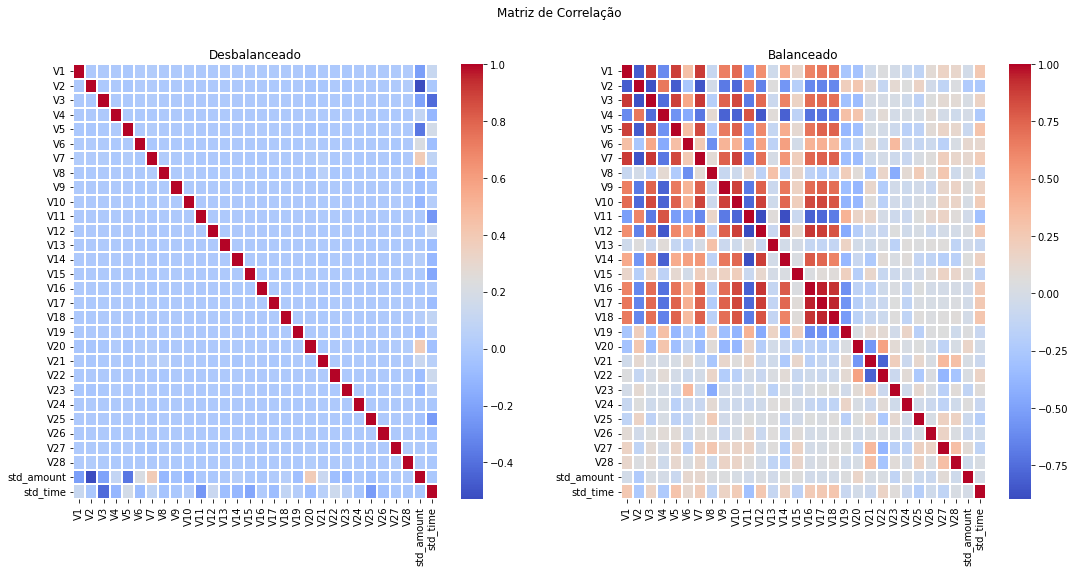

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Fica visível que nossos dados agora estão com mais informações relevantes que o antigo, que não trasia nada que poderia ser útil.

## Modelo de Machine Learning



Após toda análise exploratória e os dados preparados, chegou a hora de ciar um classificador utilizando Regressão Logística.
Após instanciar o modelo, treinaremos ele sobre os dados em `X_rus` e `Y_rus`, em seguida serão realizadas as previsões sobre o modelo dos dados de teste.

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)


### Avaliando o desempenho do modelo
Com o modelo treinado e previsões feitas. Podemos avançar para avaliação da precisão do nosso modelo.
Usando uma matriz de confusão, conseguimos enxergar qual a porcentagem do de acertos e erros do modelo.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9555    0.9771     60417
           1     0.0331    0.8762    0.0637       105

    accuracy                         0.9553     60522
   macro avg     0.5164    0.9158    0.5204     60522
weighted avg     0.9981    0.9553    0.9755     60522

Acurácia: 0.9553

AUC: 0.9158



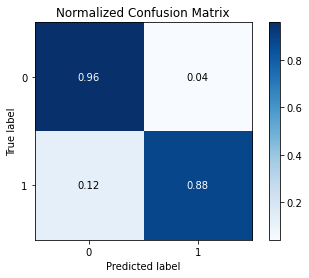

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

O modelo de Regressão Logística conseguiu um desempenho muito bom. Podemos visualizar que identificou 96% das transações genuínas e 94% das fraudes que é o que queremos identificar.

## Conclusão

Os dados com o tratamento de PCA e uma diferença grande entre as classes 1 e 0, demandaram um certo trabalho para realizar o estudo. Mesmo sem dados faltantes e bem organizados. Conseguimos chegar em um bom resultado, que identifica 96% das fraudes. Porém não descarto a possibilidade de aplicar algum outro modelo que consiga detectar 100%, para que consigamos reduzir a 0 o prejuízo.